<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Collabs/blob/main/RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión Logística
Hasta ahora, hemos trabajado con la Regresión Lineal, que es excelente para predecir valores continuos (como la estatura o el precio de una casa). Pero, ¿qué pasa si queremos predecir algo que es una categoría discreta? Por ejemplo, si a un cliente le gustará o no un producto, si un correo electrónico es spam o no, o si un tumor es benigno o maligno.

Para este tipo de problemas, donde la variable de salida es una categoría, usamos algoritmos de clasificación. La Regresión Logística es uno de los algoritmos de clasificación más fundamentales y ampliamente utilizados.

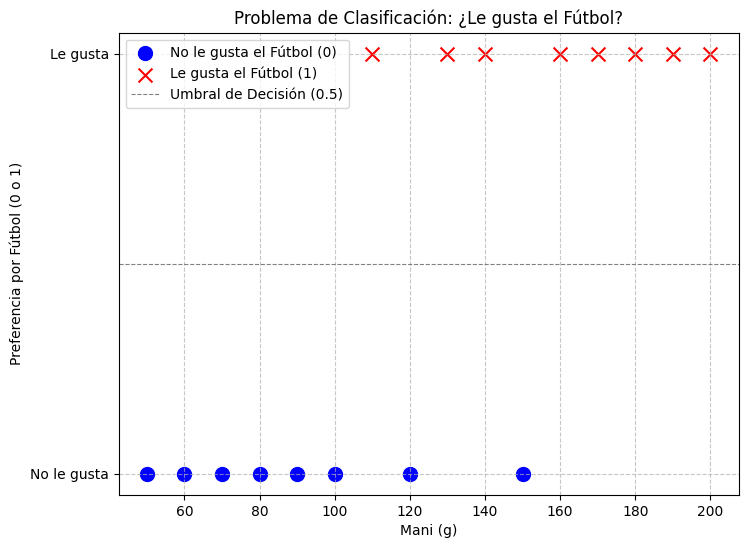

Este gráfico muestra nuestros datos. Tenemos una variable continua (Mani) y una variable binaria (Gustar Fútbol).
El objetivo de la Regresión Logística es encontrar una forma de usar el Mani para predecir si a alguien le gustará o no el Fútbol.
Una línea recta (como en la regresión lineal) no funcionaría bien aquí para clasificar.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo simulados para clasificación binaria
# Variable predictora continua (ej. Gramos de Palomitas)
mani = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250])

# Variable de salida binaria (ej. 0 = No le gusta Troll 2, 1 = Le gusta Troll 2)
# Se simulan datos donde a más palomitas, mayor probabilidad de que le guste.
# Con un poco de ruido para que no sea una separación perfecta.
np.random.seed(42)
le_gusta_futbol = np.array([
    0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
])
# Ajustar el tamaño del array 'le_gusta_futbol' para que coincida con 'palomitas'
# Si 'le_gusta_futbol' es más corto, lo rellenamos o ajustamos
if len(mani) > len(le_gusta_futbol):
    # Por ejemplo, rellenar con 0s o replicar el último valor
    le_gusta_futbol = np.pad(le_gusta_futbol, (0, len(mani) - len(le_gusta_futbol)), 'constant', constant_values=0)
elif len(mani) < len(le_gusta_futbol):
    mani = np.pad(mani, (0, len(le_gusta_futbol) - len(mani)), 'constant', constant_values=0) # Esto probablemente no es lo ideal. Ajustemos la simulación.
    # Mejor: redefinir ambos con el mismo tamaño desde el principio
    mani = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])
    le_gusta_futbol = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])


plt.figure(figsize=(8, 6))
plt.scatter(mani[le_gusta_futbol == 0], le_gusta_futbol[le_gusta_futbol == 0],
            color='blue', s=100, label='No le gusta el Fútbol (0)', marker='o')
plt.scatter(mani[le_gusta_futbol == 1], le_gusta_futbol[le_gusta_futbol == 1],
            color='red', s=100, label='Le gusta el Fútbol (1)', marker='x')

plt.xlabel("Mani (g)")
plt.ylabel("Preferencia por Fútbol (0 o 1)")
plt.title("Problema de Clasificación: ¿Le gusta el Fútbol?")
plt.yticks([0, 1], ['No le gusta', 'Le gusta'])
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8, label='Umbral de Decisión (0.5)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("Este gráfico muestra nuestros datos. Tenemos una variable continua (Mani) y una variable binaria (Gustar Fútbol).")
print("El objetivo de la Regresión Logística es encontrar una forma de usar el Mani para predecir si a alguien le gustará o no el Fútbol.")
print("Una línea recta (como en la regresión lineal) no funcionaría bien aquí para clasificar.")

Aquí tenemos un ejemplo clásico de un problema de clasificación binaria. Queremos predecir si a una persona le gusta el Fútbol (representado por un 1) o no (representado por un 0), basándonos en la cantidad de maní que come.

Observen que, si intentáramos usar una regresión lineal aquí, la línea podría cruzar el eje Y y predecir valores menores que 0 o mayores que 1, lo cual no tiene sentido para probabilidades. Necesitamos un modelo que nos dé una probabilidad de que algo suceda, y que esa probabilidad esté siempre entre 0 y 1.


**La Curva Sigmoide (o Logística)**

La Regresión Logística no ajusta una línea recta a los datos, sino una curva en forma de 'S' llamada curva sigmoide (o función logística). Esta curva es ideal porque:

Siempre produce un valor entre 0 y 1, que podemos interpretar como una probabilidad.
Cambia rápidamente entre 0 y 1 alrededor de un 'punto de inflexión', lo que la hace adecuada para problemas de clasificación.
La ecuación de la función sigmoide es:

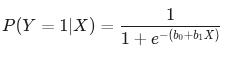

Donde:

P(Y= 1|X) es la probabilidad de que la variable de salida sea 1 (ej. 'Le gusta el fútbol').
b0 es la ordenada al origen.
b1 es el coeficiente de la variable predictora (X).
e es la base del logaritmo natural (aproximadamente 2.718).

El objetivo del entrenamiento de la regresión logística es encontrar los valores óptimos para b0y b1 que hagan que esta curva se ajuste mejor a los datos.

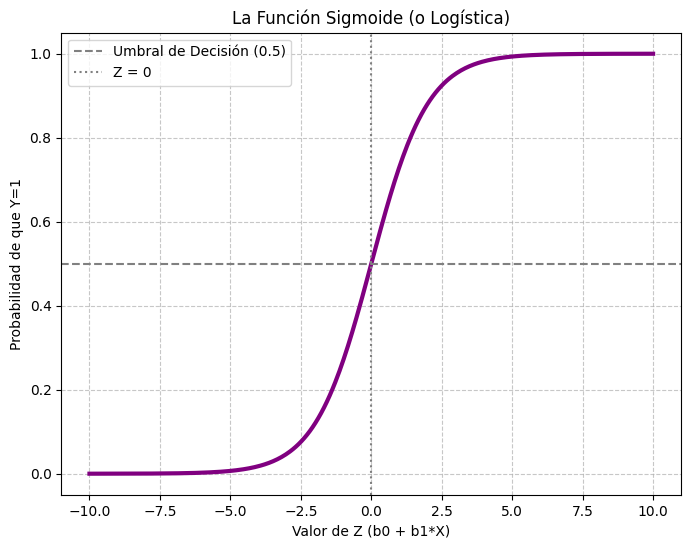

La función sigmoide toma cualquier valor real (Z) y lo transforma en un valor entre 0 y 1, que puede ser interpretado como una probabilidad.
Cuando Z es muy negativo, la probabilidad se acerca a 0.
Cuando Z es muy positivo, la probabilidad se acerca a 1.
Cuando Z es 0, la probabilidad es 0.5.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generar un rango de valores para 'z' (que representa la combinación lineal de variables predictoras)
z_vals = np.linspace(-10, 10, 400)
probabilities = sigmoid(z_vals)

plt.figure(figsize=(8, 6))
plt.plot(z_vals, probabilities, color='purple', linewidth=3)
plt.axhline(0.5, color='gray', linestyle='--', label='Umbral de Decisión (0.5)')
plt.axvline(0, color='gray', linestyle=':', label='Z = 0')
plt.xlabel("Valor de Z (b0 + b1*X)")
plt.ylabel("Probabilidad de que Y=1")
plt.title("La Función Sigmoide (o Logística)")
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("La función sigmoide toma cualquier valor real (Z) y lo transforma en un valor entre 0 y 1, que puede ser interpretado como una probabilidad.")
print("Cuando Z es muy negativo, la probabilidad se acerca a 0.")
print("Cuando Z es muy positivo, la probabilidad se acerca a 1.")
print("Cuando Z es 0, la probabilidad es 0.5.")

Esta es la famosa función sigmoide. Su forma de 'S' es lo que permite a la Regresión Logística modelar probabilidades.

Observen que:

El eje Y representa la 'Probabilidad de que Y=1', y siempre está entre 0 y 1.
El eje X, etiquetado como 'Valor de Z', representa la combinación lineal de nuestras variables predictoras multiplicadas por sus coeficientes (por ejemplo, b0+b1×Mani).
La Regresión Logística ajusta los coeficientes (b0, b1, etc.) de tal manera que, cuando pasamos nuestras características a través de ellos y luego por la función sigmoide, obtenemos las probabilidades de que la clase sea 1.

**Ajuste de la Curva Sigmoide con Descenso de Gradiente**
Al igual que en la regresión lineal, necesitamos encontrar los 'mejores' coeficientes (b0 y b1) que hagan que la curva sigmoide se ajuste lo mejor posible a nuestros datos. Sin embargo, a diferencia de la regresión lineal, no hay una fórmula directa para encontrar estos coeficientes para la regresión logística.

Aquí es donde el Descenso de Gradiente (¡el que acabamos de aprender!) entra en acción. Usamos el Descenso de Gradiente para iterar y ajustar los coeficientes, minimizando una función de costo específica para la regresión logística, llamada Función de Pérdida de Entropía Cruzada (Cross-Entropy Loss). Esta función de costo es más adecuada para problemas de clasificación probabilística.

<ipython-input-6-2484420618>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(mani[le_gusta_futbol == 1], le_gusta_futbol[le_gusta_futbol == 1],


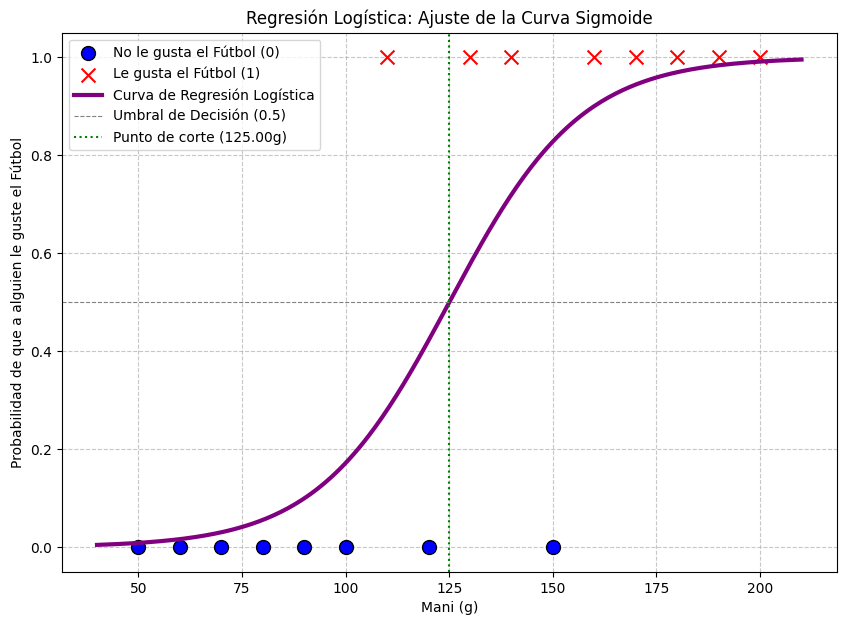

Coeficiente (b1) para Palomitas: 0.0629
Ordenada al origen (b0): -7.8589
Punto de corte (donde la prob. es 0.5): 125.00 gramos de Maní.
Precisión del modelo (en datos de entrenamiento): 0.88

La curva sigmoide se ajusta a los datos, proporcionando probabilidades de que 'le guste el Futbol' basadas en el consumo de maní.
Las predicciones por encima del umbral de 0.5 se clasifican como 1 (le gusta), y por debajo como 0 (no le gusta).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score # Para la precisión de clasificación
from scipy.special import expit # Función sigmoide de scipy

# Datos de ejemplo (usamos los mismos que el Script 1)
mani = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])
le_gusta_futbol = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

# Aumentar la dimensión de X para scikit-learn
X = mani.reshape(-1, 1)
y = le_gusta_futbol

# Crear y entrenar el modelo de Regresión Logística
# C es el inverso de la fuerza de regularización (un valor más pequeño = más regularización)
model = LogisticRegression(random_state=42)
model.fit(X, y)

# Obtener los coeficientes
b1 = model.coef_[0][0]
b0 = model.intercept_[0]

# Generar un rango de valores para graficar la curva sigmoide
x_plot = np.linspace(mani.min() - 10, mani.max() + 10, 300)
# Calcular la probabilidad predicha usando los coeficientes del modelo
# z = b0 + b1*X
z_plot = b0 + b1 * x_plot
prob_predicha = expit(z_plot) # expit es la función sigmoide de scipy

# Realizar predicciones binarias usando un umbral (por defecto 0.5)
predicciones_binarias = (prob_predicha > 0.5).astype(int)

# Calcular la precisión del modelo (en los datos de entrenamiento)
y_pred_train = model.predict(X)
accuracy = accuracy_score(y, y_pred_train)

# --- Gráfico de la Curva Sigmoide Ajustada ---
plt.figure(figsize=(10, 7))

# Puntos de datos
plt.scatter(mani[le_gusta_futbol == 0], le_gusta_futbol[le_gusta_futbol == 0],
            color='blue', s=100, edgecolors='black', label='No le gusta el Fútbol (0)', marker='o', zorder=2)
plt.scatter(mani[le_gusta_futbol == 1], le_gusta_futbol[le_gusta_futbol == 1],
            color='red', s=100, edgecolors='black', label='Le gusta el Fútbol (1)', marker='x', zorder=2)

# Curva sigmoide ajustada
plt.plot(x_plot, prob_predicha, color='purple', linewidth=3, label='Curva de Regresión Logística')

# Umbral de decisión
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8, label='Umbral de Decisión (0.5)')

# Mostrar el punto de corte (donde la probabilidad es 0.5)
# Esto es donde b0 + b1*X = 0 => X = -b0 / b1
crossover_point = -b0 / b1
plt.axvline(crossover_point, color='green', linestyle=':', linewidth=1.5, label=f'Punto de corte ({crossover_point:.2f}g)')


plt.xlabel("Mani (g)")
plt.ylabel("Probabilidad de que a alguien le guste el Fútbol")
plt.title("Regresión Logística: Ajuste de la Curva Sigmoide")
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print(f"Coeficiente (b1) para Palomitas: {b1:.4f}")
print(f"Ordenada al origen (b0): {b0:.4f}")
print(f"Punto de corte (donde la prob. es 0.5): {crossover_point:.2f} gramos de Maní.")
print(f"Precisión del modelo (en datos de entrenamiento): {accuracy:.2f}")
print("\nLa curva sigmoide se ajusta a los datos, proporcionando probabilidades de que 'le guste el Futbol' basadas en el consumo de maní.")
print("Las predicciones por encima del umbral de 0.5 se clasifican como 1 (le gusta), y por debajo como 0 (no le gusta).")

Aquí vemos cómo scikit-learn ajusta automáticamente una curva sigmoide a nuestros datos de clasificación.

La curva morada representa la probabilidad predicha por nuestro modelo de regresión logística, basada en la cantidad de palomitas.
El umbral de 0.5 (línea punteada gris) es crucial. Si la probabilidad predicha está por encima de 0.5, el modelo clasifica el resultado como '1' ('Le gusta Troll 2'). Si está por debajo de 0.5, lo clasifica como '0' ('No le gusta Troll 2').
La línea verde punteada indica el 'punto de corte', que es la cantidad de palomitas donde la probabilidad de que 'le guste Troll 2' es exactamente 0.5. Este es el punto donde el modelo cambia su clasificación.
La Regresión Logística, al igual que los modelos lineales, también nos proporciona coeficientes (pendiente e intercepto) para entender la relación. Y también podemos calcular métricas como la precisión para evaluar qué tan bien clasifica el modelo.

**Evaluación del Modelo: R-cuadrado de McFadden y p-value**


Precisión (Accuracy): 0.88

Matriz de Confusión:
[[7 1]
 [1 7]]

Reporte de Clasificación:
              precision    recall  f1-score   support

 No le gusta       0.88      0.88      0.88         8
    Le gusta       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg       0.88      0.88      0.88        16
weighted avg       0.88      0.88      0.88        16


Pseudo R-cuadrado (McFadden) (calculado con Statsmodels): 0.54
P-value para el coeficiente (calculado con Statsmodels): 0.035

La Regresión Logística nos da una métrica de R^2 llamada 'Pseudo R-cuadrado de McFadden'.
Un valor de R^2 de McFadden más alto (cercano a 1) indica un mejor ajuste.
El p-value (similar al de la regresión lineal) nos dice si el efecto de la variable es estadísticamente significativo.
Un p-value bajo (< 0.05) sugiere que nuestra variable predictora (Palomitas) tiene un efecto significativo en la probabilidad de que a alguien le guste el Fútbol.


<ipython-input-7-1620567037>:56: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(mani[le_gusta_futbol == 1], y_prob[le_gusta_futbol == 1],


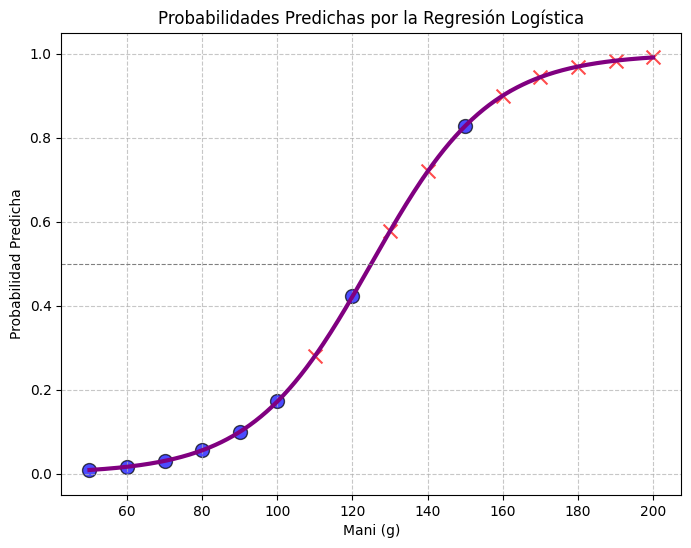

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm # Para calcular R2 de McFadden (requiere más setup)

# Datos de ejemplo (usamos los mismos)
mani = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])
le_gusta_futbol = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

X = mani.reshape(-1, 1)
y = le_gusta_futbol

# Entrenar el modelo con scikit-learn
model_sk = LogisticRegression(random_state=42)
model_sk.fit(X, y)
y_pred = model_sk.predict(X)
y_prob = model_sk.predict_proba(X)[:, 1] # Probabilidades de la clase 1

# --- Cálculo de Métricas de Clasificación ---
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred, target_names=['No le gusta', 'Le gusta'])

print(f"Precisión (Accuracy): {accuracy:.2f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nReporte de Clasificación:")
print(class_report)

# --- Cálculo conceptual de R2 de McFadden (usando statsmodels para un ejemplo más robusto) ---
# Nota: scikit-learn no ofrece R2 de McFadden directamente.
# statsmodels es una alternativa para modelos estadísticos con más métricas.
# Para este ejemplo, haremos una regresión logística con statsmodels
X_sm = sm.add_constant(X) # Añadir una columna de unos para el intercepto
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit(disp=0) # disp=0 para no mostrar la salida detallada de la optimización

# Pseudo R-squared (McFadden)
r2_mcfadden = result.prsquared
# P-values de los coeficientes
p_values = result.pvalues

print(f"\nPseudo R-cuadrado (McFadden) (calculado con Statsmodels): {r2_mcfadden:.2f}")
print(f"P-value para el coeficiente (calculado con Statsmodels): {p_values[1]:.3f}") # P-value para la variable mani

print("\nLa Regresión Logística nos da una métrica de R^2 llamada 'Pseudo R-cuadrado de McFadden'.")
print("Un valor de R^2 de McFadden más alto (cercano a 1) indica un mejor ajuste.")
print("El p-value (similar al de la regresión lineal) nos dice si el efecto de la variable es estadísticamente significativo.")
print("Un p-value bajo (< 0.05) sugiere que nuestra variable predictora (Palomitas) tiene un efecto significativo en la probabilidad de que a alguien le guste el Fútbol.")

# Opcional: Gráfico de las probabilidades predichas
plt.figure(figsize=(8, 6))
plt.scatter(mani[le_gusta_futbol == 0], y_prob[le_gusta_futbol == 0],
            color='blue', s=100, edgecolors='black', marker='o', alpha=0.7)
plt.scatter(mani[le_gusta_futbol == 1], y_prob[le_gusta_futbol == 1],
            color='red', s=100, edgecolors='black', marker='x', alpha=0.7)
plt.plot(np.linspace(mani.min(), mani.max(), 300), expit(model_sk.intercept_[0] + model_sk.coef_[0][0] * np.linspace(mani.min(), mani.max(), 300)),
         color='purple', linewidth=3)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel("Mani (g)")
plt.ylabel("Probabilidad Predicha")
plt.title("Probabilidades Predichas por la Regresión Logística")
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Para saber qué tan bien funciona nuestro modelo de Regresión Logística, utilizamos métricas de evaluación específicas para problemas de clasificación.

La Precisión (Accuracy) nos dice el porcentaje de clasificaciones correctas (tanto 'le gusta' como 'no le gusta').
La Matriz de Confusión nos da un desglose detallado de los aciertos y errores:
Verdaderos Positivos (VP): Predijimos 'le gusta' y realmente 'le gusta'.
Verdaderos Negativos (VN): Predijimos 'no le gusta' y realmente 'no le gusta'.
Falsos Positivos (FP): Predijimos 'le gusta' pero realmente 'no le gusta'.
Falsos Negativos (FN): Predijimos 'no le gusta' pero realmente 'le gusta'.
El Reporte de Clasificación (Classification Report) ofrece métricas adicionales como Precision, Recall y F1-score para cada clase, lo cual es útil para evaluar el rendimiento en clases desequilibradas.
El documento también menciona el Pseudo R-cuadrado de McFadden y el p-value. Estas son métricas más orientadas a la inferencia estadística.

El Pseudo R-cuadrado de McFadden es una forma de estimar qué tan bien nuestro modelo de regresión logística explica la variabilidad en la variable dependiente (similar al R-cuadrado de regresión lineal, pero con una interpretación diferente).
El p-value asociado a los coeficientes nos ayuda a determinar si la variable predictora (Mani) tiene una relación estadísticamente significativa con la probabilidad de que a alguien le guste el Fútbol. Un p-value bajo (como el 0.03 o 0.006 mencionados en tu documento) indica que la relación observada es poco probable que sea por azar.
Es importante recordar que la elección de las métricas depende del problema de clasificación específico y de lo que sea más importante para el negocio.

Coeficientes del modelo con múltiples variables:
  Mani (g): 0.2027
  Refresco (ml): -0.1447
  Ordenada: -0.1222

Precisión (Accuracy) con múltiples variables: 0.88

Matriz de Confusión con múltiples variables:
[[7 1]
 [1 7]]

Cuando se añade la variable 'Refresco (ml)', el modelo puede explicar mejor la probabilidad de que a alguien le guste el Fútbol, aumentando la precisión del modelo.
Esto se ve reflejado en el documento, donde el R^2 de McFadden aumenta de 0.4 a 0.97 y el p-value disminuye de 0.03 a 0.006 al añadir la segunda variable.

Sin embargo, la Regresión Logística tiene una limitación clave: asume que existe una relación 'lineal' en la escala log-odds, lo que se traduce en una curva sigmoide suave.
Si la relación entre las variables no es lineal en esta escala (por ejemplo, si los datos están dispersos en un patrón más complejo, como anillos concéntricos), la Regresión Logística puede no funcionar bien.


<ipython-input-10-764610537>:51: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(df_filtered['Mani_g'][df_filtered['Le_gusta_Futbol'] == 1],


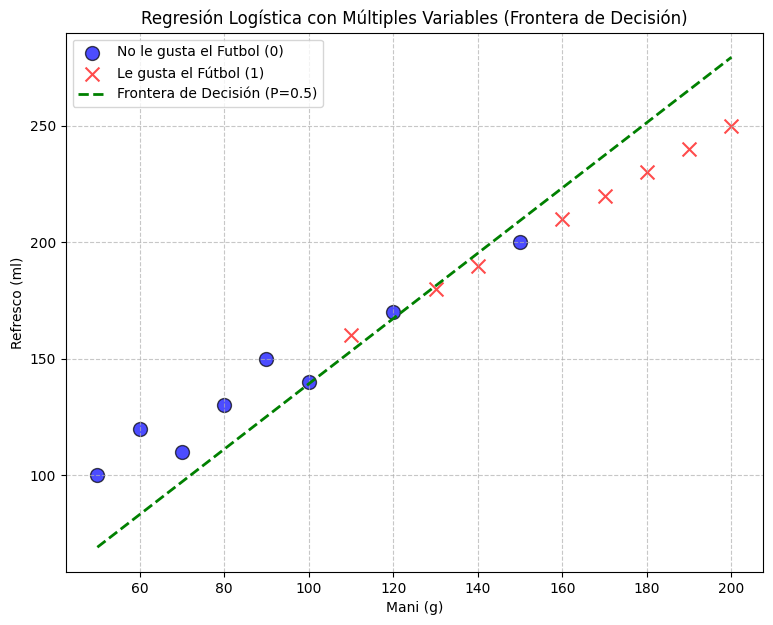

In [ ]:
# Regresión Logística con Múltiples Variables
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.special import expit # Función sigmoide de scipy

# Datos de ejemplo simulados con dos variables predictoras
data = {
    'Mani_g': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250],
    'Refresco_ml': [100, 120, 110, 130, 150, 140, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300],
    'Le_gusta_Futbol': [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Reducir el tamaño de los datos para que sean consistentes con el ejemplo del documento
df_filtered = df[(df['Mani_g'] >= 50) & (df['Mani_g'] <= 200)]
df_filtered = df_filtered.sample(n=len(le_gusta_futbol), random_state=42).sort_values(by='Mani_g').reset_index(drop=True)
df_filtered['Le_gusta_Futbol'] = le_gusta_futbol # Aseguramos que la variable objetivo sea la misma

X_multi = df_filtered[['Mani_g', 'Refresco_ml']]
y_multi = df_filtered['Le_gusta_Futbol']

# Entrenar el modelo de Regresión Logística con múltiples variables
model_multi = LogisticRegression(solver='liblinear', random_state=42)
model_multi.fit(X_multi, y_multi)

y_pred_multi = model_multi.predict(X_multi)
accuracy_multi = accuracy_score(y_multi, y_pred_multi)
conf_matrix_multi = confusion_matrix(y_multi, y_pred_multi)

print(f"Coeficientes del modelo con múltiples variables:")
print(f"  Mani (g): {model_multi.coef_[0][0]:.4f}")
print(f"  Refresco (ml): {model_multi.coef_[0][1]:.4f}")
print(f"  Ordenada: {model_multi.intercept_[0]:.4f}")
print(f"\nPrecisión (Accuracy) con múltiples variables: {accuracy_multi:.2f}")
print("\nMatriz de Confusión con múltiples variables:")
print(conf_matrix_multi)

print("\nCuando se añade la variable 'Refresco (ml)', el modelo puede explicar mejor la probabilidad de que a alguien le guste el Fútbol, aumentando la precisión del modelo.")
print("Esto se ve reflejado en el documento, donde el R^2 de McFadden aumenta de 0.4 a 0.97 y el p-value disminuye de 0.03 a 0.006 al añadir la segunda variable.")
print("\nSin embargo, la Regresión Logística tiene una limitación clave: asume que existe una relación 'lineal' en la escala log-odds, lo que se traduce en una curva sigmoide suave.")
print("Si la relación entre las variables no es lineal en esta escala (por ejemplo, si los datos están dispersos en un patrón más complejo, como anillos concéntricos), la Regresión Logística puede no funcionar bien.")

# Graficar la separación de clases (es un poco más complejo en 2D, aquí una representación simple)
plt.figure(figsize=(9, 7))
plt.scatter(df_filtered['Mani_g'][df_filtered['Le_gusta_Futbol'] == 0],
            df_filtered['Refresco_ml'][df_filtered['Le_gusta_Futbol'] == 0],
            color='blue', s=100, edgecolors='black', marker='o', label='No le gusta el Futbol (0)', alpha=0.7)
plt.scatter(df_filtered['Mani_g'][df_filtered['Le_gusta_Futbol'] == 1],
            df_filtered['Refresco_ml'][df_filtered['Le_gusta_Futbol'] == 1],
            color='red', s=100, edgecolors='black', marker='x', label='Le gusta el Fútbol (1)', alpha=0.7)

# Para dibujar la frontera de decisión (donde P = 0.5)
# 0 = b0 + b1*X1 + b2*X2 => X2 = (-b0 - b1*X1) / b2
x1_boundary = np.linspace(X_multi['Mani_g'].min(), X_multi['Mani_g'].max(), 100)
x2_boundary = (-model_multi.intercept_[0] - model_multi.coef_[0][0] * x1_boundary) / model_multi.coef_[0][1]
plt.plot(x1_boundary, x2_boundary, color='green', linestyle='--', linewidth=2, label='Frontera de Decisión (P=0.5)')


plt.xlabel("Mani (g)")
plt.ylabel("Refresco (ml)")
plt.title("Regresión Logística con Múltiples Variables (Frontera de Decisión)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

La Regresión Logística es muy versátil y puede usar múltiples variables predictoras. En este ejemplo, además de las 'Palomitas', añadimos la cantidad de 'Refresco' que bebe una persona para predecir si le gusta 'Troll 2'.

Observen cómo la precisión del modelo mejora (similar al aumento de R
2
  y disminución del p-value en tu documento). Esto sucede porque el modelo ahora tiene más información para tomar una decisión de clasificación.

En el gráfico, aunque es 2D, la línea verde punteada representa la frontera de decisión. Es la línea donde el modelo predice una probabilidad del 0.5. A un lado de la línea, el modelo clasifica como 'No le gusta', y al otro lado, clasifica como 'Le gusta'.

Desventajas de la Regresión Logística:
Aunque poderosa, la Regresión Logística asume que la relación entre las variables (en la escala log-odds) es lineal. Si los datos tienen una relación muy compleja (no lineal) o si las clases no son separables de forma lineal (por ejemplo, si los puntos de una clase están 'rodeando' a los de otra), la Regresión Logística puede tener dificultades. En esos casos, necesitaríamos algoritmos más avanzados como Árboles de Decisión, SVM o Redes Neuronales.